In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df = pd.read_csv('../Data/datacar_cleaned.csv')
print(df.head)

<bound method NDFrame.head of       year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0     2014         450000     145500     1            1             1      0   
1     2014         370000     120000     1            1             1      2   
2     2006         158000     140000     3            1             1      4   
3     2010         225000     127000     1            1             1      0   
4     2007         130000     120000     3            1             1      0   
...    ...            ...        ...   ...          ...           ...    ...   
8123  2013         320000     110000     3            1             1      0   
8124  2007         135000     119000     1            1             1      1   
8125  2009         382000     120000     1            1             1      0   
8126  2013         290000      25000     1            1             1      0   
8127  2013         290000      25000     1            1             1      0   

      mil

In [3]:
# Spliting Features and Target 
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [4]:
#Spliting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [6]:
#Fittiing the model
support = SVR()
support.fit(X_train, y_train)

SVR()

In [8]:
#Making Predicting
y_pred = support.predict(X_test)


In [10]:
#Evaluating the SVR
# Evaluation of the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
root_mse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")
print(f"Root Mean Squared Error: {root_mse}")

Mean Squared Error: 686159558429.953
Mean Absolute Error: 380120.2929984557
R2 Score: -0.055604326167053575
Root Mean Squared Error: 828347.4865235924


In [11]:
#saving to the csv
evalation = []
model = "SVR"
evalation.append({
    'model': model, 
    'MAE': mae,
    'MSE' : mse,
    'r2score' : r2,
    'Root MSE' : root_mse
})
# Creating a DataFrame to display the evaluation metrics
ev_df = pd.DataFrame(evalation)
print(ev_df)
ev_df.to_csv('../data/evaluation.csv', mode='a', header=False, index=False)

  model            MAE           MSE   r2score       Root MSE
0   SVR  380120.292998  6.861596e+11 -0.055604  828347.486524


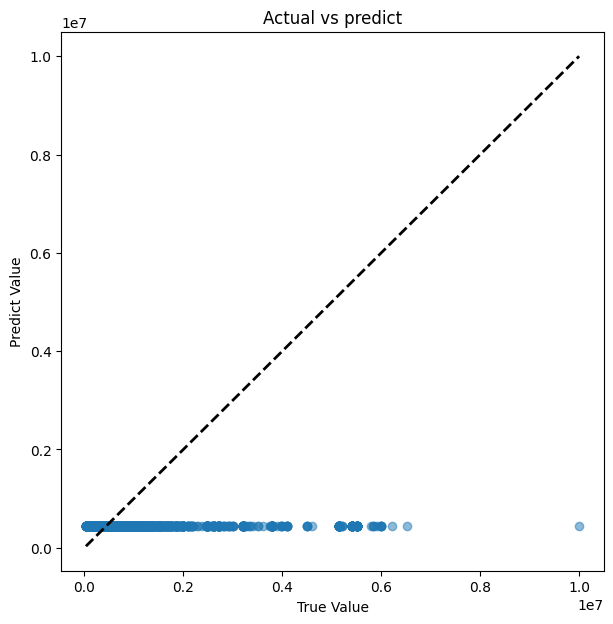

In [15]:
#Ploting 
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("True Value")
plt.ylabel("Predict Value")
plt.title("Actual vs predict")
plt.show()